In [1]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

W0628 14:59:53.538576 140574277310208 deprecation_wrapper.py:119] From /home/arnab/tinkering-projects/stylegan-encoder/dnnlib/tflib/tfutil.py:34: The name tf.Dimension is deprecated. Please use tf.compat.v1.Dimension instead.

W0628 14:59:53.539288 140574277310208 deprecation_wrapper.py:119] From /home/arnab/tinkering-projects/stylegan-encoder/dnnlib/tflib/tfutil.py:74: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0628 14:59:53.539621 140574277310208 deprecation_wrapper.py:119] From /home/arnab/tinkering-projects/stylegan-encoder/dnnlib/tflib/tfutil.py:128: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



In [2]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14360165548493012417
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3037609977927758830
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15257350725817036865
physical_device_desc: "device: XLA_GPU device"
]


In [3]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)



W0628 15:00:00.042873 140574277310208 deprecation_wrapper.py:119] From /home/arnab/tinkering-projects/stylegan-encoder/dnnlib/tflib/tfutil.py:97: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0628 15:00:00.043565 140574277310208 deprecation_wrapper.py:119] From /home/arnab/tinkering-projects/stylegan-encoder/dnnlib/tflib/tfutil.py:109: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.

W0628 15:00:01.892554 140574277310208 deprecation.py:323] From <string>:364: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

InvalidArgumentError: Cannot assign a device for operation learnable_dlatents/read: node learnable_dlatents/read (defined at /home/arnab/tinkering-projects/stylegan-encoder/encoder/generator_model.py:15) was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0, /job:localhost/replica:0/task:0/device:XLA_GPU:0 ]. Make sure the device specification refers to a valid device.
	 [[learnable_dlatents/read]]

In [6]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [7]:
# Loading already learned representations
donald_trump = np.load('ffhq_dataset/latent_representations/donald_trump_01.npy')
hillary_clinton = np.load('ffhq_dataset/latent_representations/hillary_clinton_01.npy')

# Of course you can learn your own vectors using two scripts

# 1) Extract and align faces from images
# python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
# python encode_images.py aligned_images/ generated_images/ latent_representations/

In [8]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')

# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

# Smile transformation

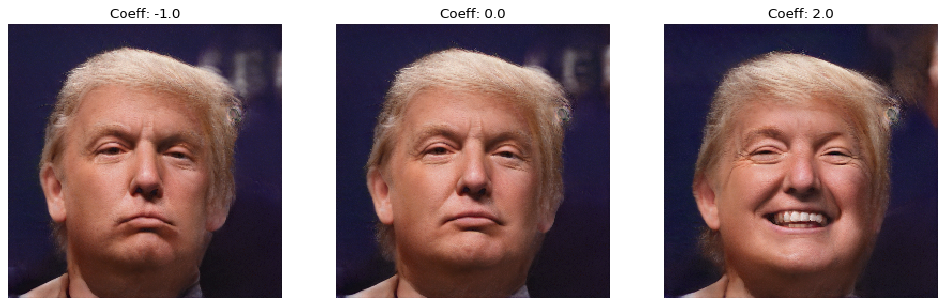

In [9]:
move_and_show(donald_trump, smile_direction, [-1, 0, 2])

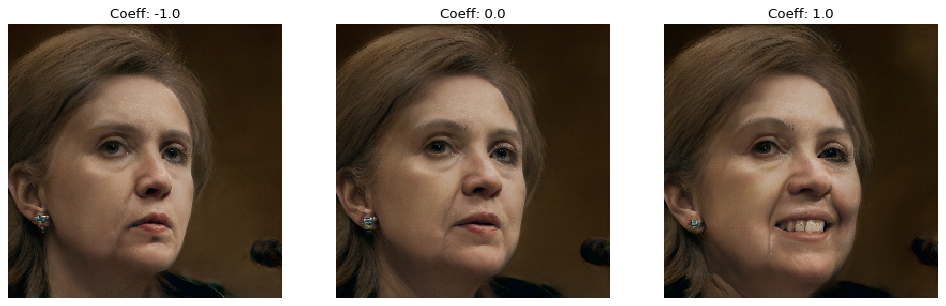

In [10]:
move_and_show(hillary_clinton, smile_direction, [-1, 0, 1])

# Gender transformation

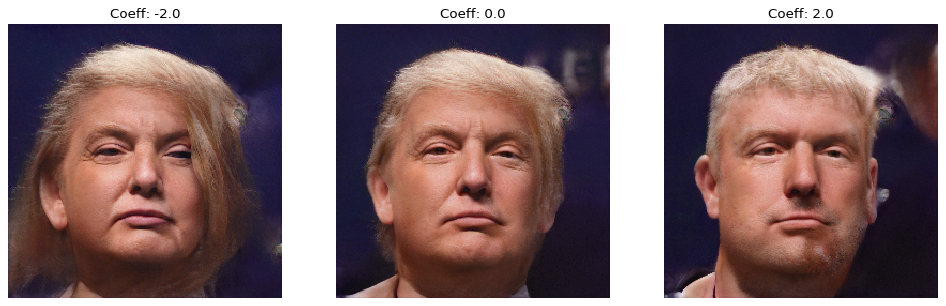

In [11]:
move_and_show(donald_trump, gender_direction, [-2, 0, 2])

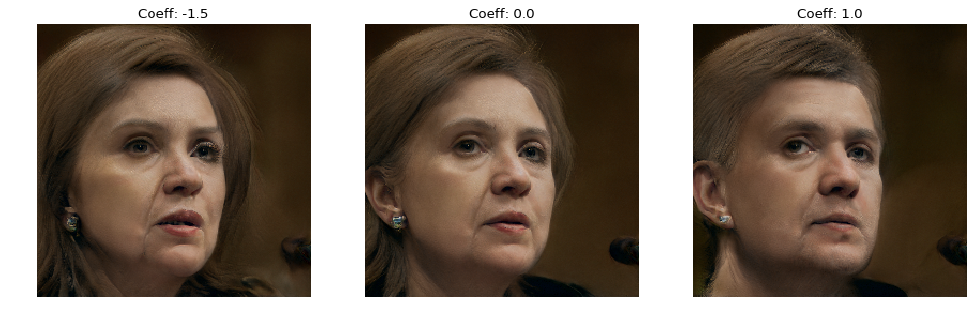

In [15]:
move_and_show(hillary_clinton, gender_direction, [-1.5, 0, 1.])

# Age transformation

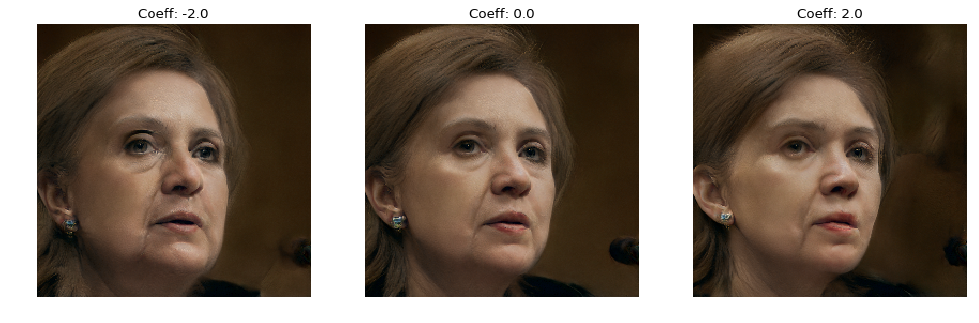

In [17]:
move_and_show(hillary_clinton, age_direction, [-2, 0, 2])

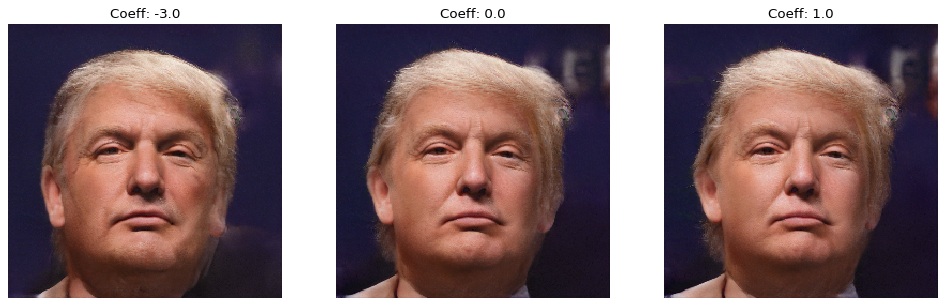

In [12]:
# try it yourself!
move_and_show(donald_trump, age_direction, [-3, 0, 1])